In [1]:
pip install matplotlib pandas numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import json
import pandas as pd
import numpy as np
import glob
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

VERSIONS = [ "1.8.0_292", "11.0.11", "14.0.2", "16.0.1" ]

In [15]:
temp = pd.DataFrame()

DATA_PATH = "../data/"
json_pattern = os.path.join(DATA_PATH, 'artemis*.json')
file_list = glob.glob(json_pattern)

for file in file_list:
    f = open(file)
    data = json.load(f)
    f.close()
    frame = pd.json_normalize(data)
    temp = temp.append(frame, ignore_index = True)

temp.head()

data java.class_version  \
0  [{'avg': 456101433, 'config': {'direct': True,...               55.0   
1  [{'avg': 447168128, 'config': {'direct': True,...               52.0   
2  [{'avg': 474074719, 'config': {'direct': True,...               58.0   
3  [{'avg': 454082117, 'config': {'direct': True,...               55.0   
4  [{'avg': 443429753, 'config': {'direct': True,...               58.0   

  java.os_arch                    java.runtime_version java.version  \
0        amd64         11.0.11+9-Ubuntu-0ubuntu2.20.04      11.0.11   
1        amd64  1.8.0_292-8u292-b10-0ubuntu1~20.04-b10    1.8.0_292   
2        amd64                 14.0.2+12-Ubuntu-120.04       14.0.2   
3        amd64         11.0.11+9-Ubuntu-0ubuntu2.20.04      11.0.11   
4        amd64                 14.0.2+12-Ubuntu-120.04       14.0.2   

                    java.vm                  java.vm_version  memory.free  \
0  OpenJDK 64-Bit Server VM  11.0.11+9-Ubuntu-0ubuntu2.20.04   1061604088   
1  OpenJDK 64-Bit Server VM                       25.292-b10   1000781880   
2  OpenJDK 64-Bit Server VM          14.0.2+12-Ubuntu-120.04   1059338032   
3  OpenJDK 64-Bit Server VM  11.0.11+9-Ubuntu-0ubuntu2.20.04   1061604088   
4  OpenJDK 64-Bit Server VM          14.0.2+12-Ubuntu-120.04   1059338032   

    memory.max  memory.proc  memory.total  params.bufferSize  params.fileSize  \
0  16856907776           12    1065353216              36864       1073741824   
1  14984151040           12    1011351552              65536       1073741824   
2  16856907776           12    1065353216              49152       1073741824   
3  16856907776           12    1065353216              49152       1073741824   
4  16856907776           12    1065353216              57344       1073741824   

                                      params.path  params.repeats  \
0  target/artemis_36864_java-11-openjdk-amd64.out               2   
1   target/artemis_65536_java-8-openjdk-amd64.out               2   
2  target/artemis_49152_java-14-openjdk-amd64.out               2   
3  target/artemis_49152_java-11-openjdk-amd64.out               2   
4  target/artemis_57344_java-14-openjdk-amd64.out               2   

   params.timestamp  params.warmup  
0     1630418428881              1  
1     1630417905983              1  
2     1630418774933              1  
3     1630418772951              1  
4     1630417588026              1

In [14]:
results = pd.DataFrame()
for x in range(temp.data.shape[0]):
    row = pd.json_normalize(temp['data'][x])
    row['parent'] = x
    results = results.append(row, ignore_index = True)
results.head()

avg        max        min       sygma   sygmaPct              test  \
0  456101433  465833143  446369724   9731709.0  49.999997  ArtemisGenerator   
1   29344902   31519050   27170755   2174147.0  49.999989      ArtemisInput   
2  447168128  453577676  440758581   6409547.0  49.999996  ArtemisGenerator   
3   19341348   19379024   19303673     37675.0  49.999336      ArtemisInput   
4  474074719  502230664  445918775  28155944.0  49.999999  ArtemisGenerator   

                   timing  config.direct  config.fdataSync  config.queueSize  \
0  [465833143, 446369724]           True              True               128   
1    [31519050, 27170755]          False             False               128   
2  [453577676, 440758581]           True              True                32   
3    [19379024, 19303673]          False             False                32   
4  [445918775, 502230664]           True              True               256   

   config.semaphore  memory.free   memory.max  memory.proc  memory.total  \
0              True     34305224  16856907776           12      41943040   
1              True     29139008  16856907776           12      41943040   
2              True   1000200584  14984151040           12    1011351552   
3              True    996969032  14984151040           12    1011351552   
4              True     32667776  16856907776           12      41943040   

   parent  
0       0  
1       0  
2       1  
3       1  
4       2

In [20]:
joined = pd.merge(results[['avg', 'min', 'max', 'sygma', 'test', 'parent', 'config.queueSize']], temp[['java.version', 'params.bufferSize']], left_on='parent', right_on=temp.index, how='left')
joined.head()

avg        min        max       sygma              test  parent  \
0  456101433  446369724  465833143   9731709.0  ArtemisGenerator       0   
1   29344902   27170755   31519050   2174147.0      ArtemisInput       0   
2  447168128  440758581  453577676   6409547.0  ArtemisGenerator       1   
3   19341348   19303673   19379024     37675.0      ArtemisInput       1   
4  474074719  445918775  502230664  28155944.0  ArtemisGenerator       2   

   config.queueSize java.version  params.bufferSize  
0               128      11.0.11              36864  
1               128      11.0.11              36864  
2                32    1.8.0_292              65536  
3                32    1.8.0_292              65536  
4               256       14.0.2              49152

In [5]:
#joined = joined.set_index('test')
#axes = gb.plot.bar(x='java.version', y=['avg', 'min', 'max'], figsize=(20,10), subplots=False)
#axes[1].legend(loc=2)

In [21]:
inputs = joined[joined['test'].str.endswith("Input")].sort_values(['test', 'java.version'])
outputs = joined[joined['test'].str.endswith("Generator")].sort_values(['test', 'java.version'])
inputs

avg       min       max      sygma          test  parent  \
3    19341348  19303673  19379024    37675.0  ArtemisInput       1   
15   13526832  12540780  14512885   986052.0  ArtemisInput       7   
23   48094138  44470100  51718177  3624038.0  ArtemisInput      11   
33   19352293  19208649  19495938   143644.0  ArtemisInput      16   
41   23602832  22306519  24899145  1296313.0  ArtemisInput      20   
..        ...       ...       ...        ...           ...     ...   
901  24488584  23834799  25142369   653785.0  ArtemisInput     450   
911  18646195  18571706  18720685    74489.0  ArtemisInput     455   
913  17285813  16551543  18020084   734270.0  ArtemisInput     456   
915  31546608  29850710  33242506  1695898.0  ArtemisInput     457   
919  19683670  17858010  21509330  1825660.0  ArtemisInput     459   

     config.queueSize java.version  params.bufferSize  
3                  32    1.8.0_292              65536  
15                128    1.8.0_292              94208  
23                128    1.8.0_292              16384  
33                 64    1.8.0_292              69632  
41                 32    1.8.0_292              53248  
..                ...          ...                ...  
901                64       16.0.1              36864  
911                64       16.0.1              69632  
913               128       16.0.1              69632  
915                64       16.0.1              28672  
919               256       16.0.1              73728  

[460 rows x 9 columns]

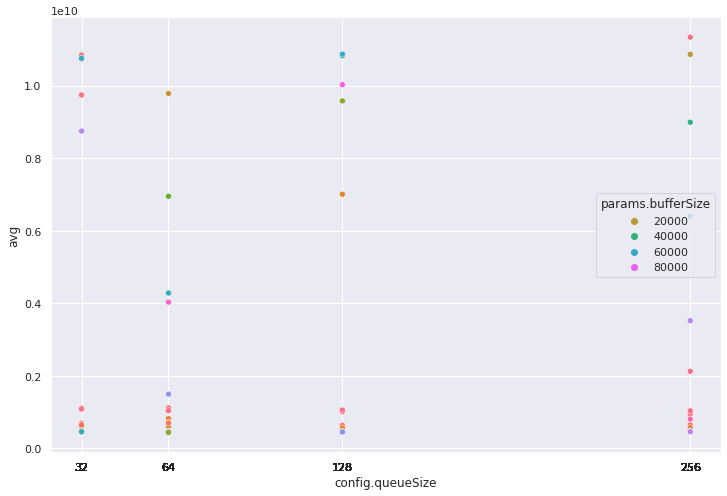

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
qs = sns.scatterplot(ax=ax,
    data=outputs, palette='husl',
    x="config.queueSize", y='avg', hue='params.bufferSize')
fig.set_size_inches(12, 8)
ax.set_xticks(outputs['config.queueSize'])
plt.show()

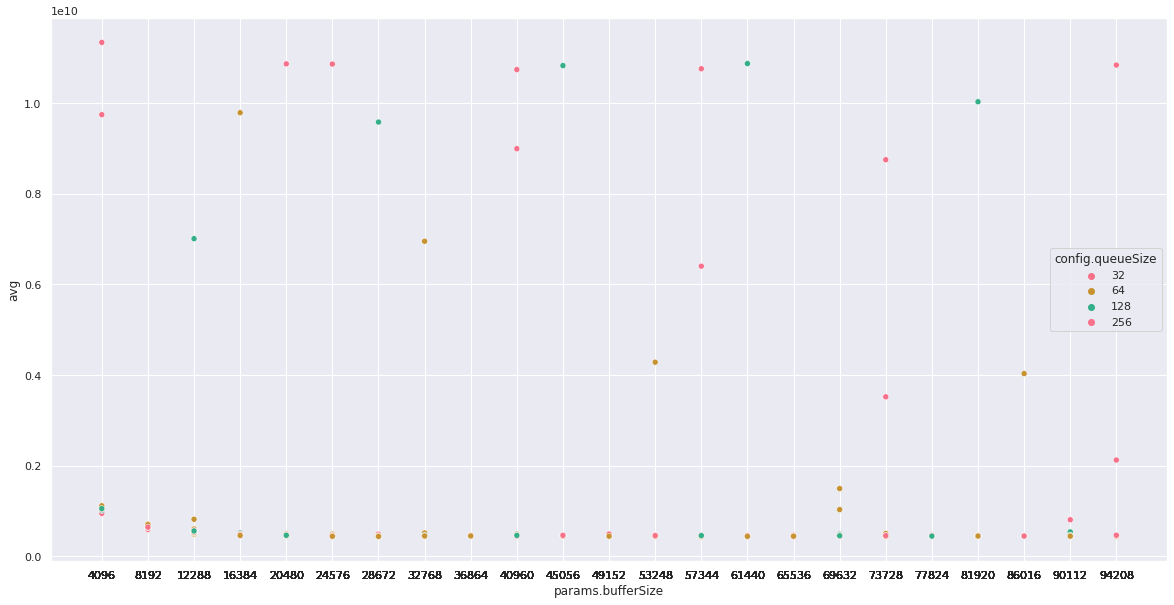

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
bs = sns.scatterplot(ax=ax,
    data=outputs, palette='husl',
    x="params.bufferSize", y='avg', hue='config.queueSize')
ax.set_xticks(outputs['params.bufferSize'])
plt.show()

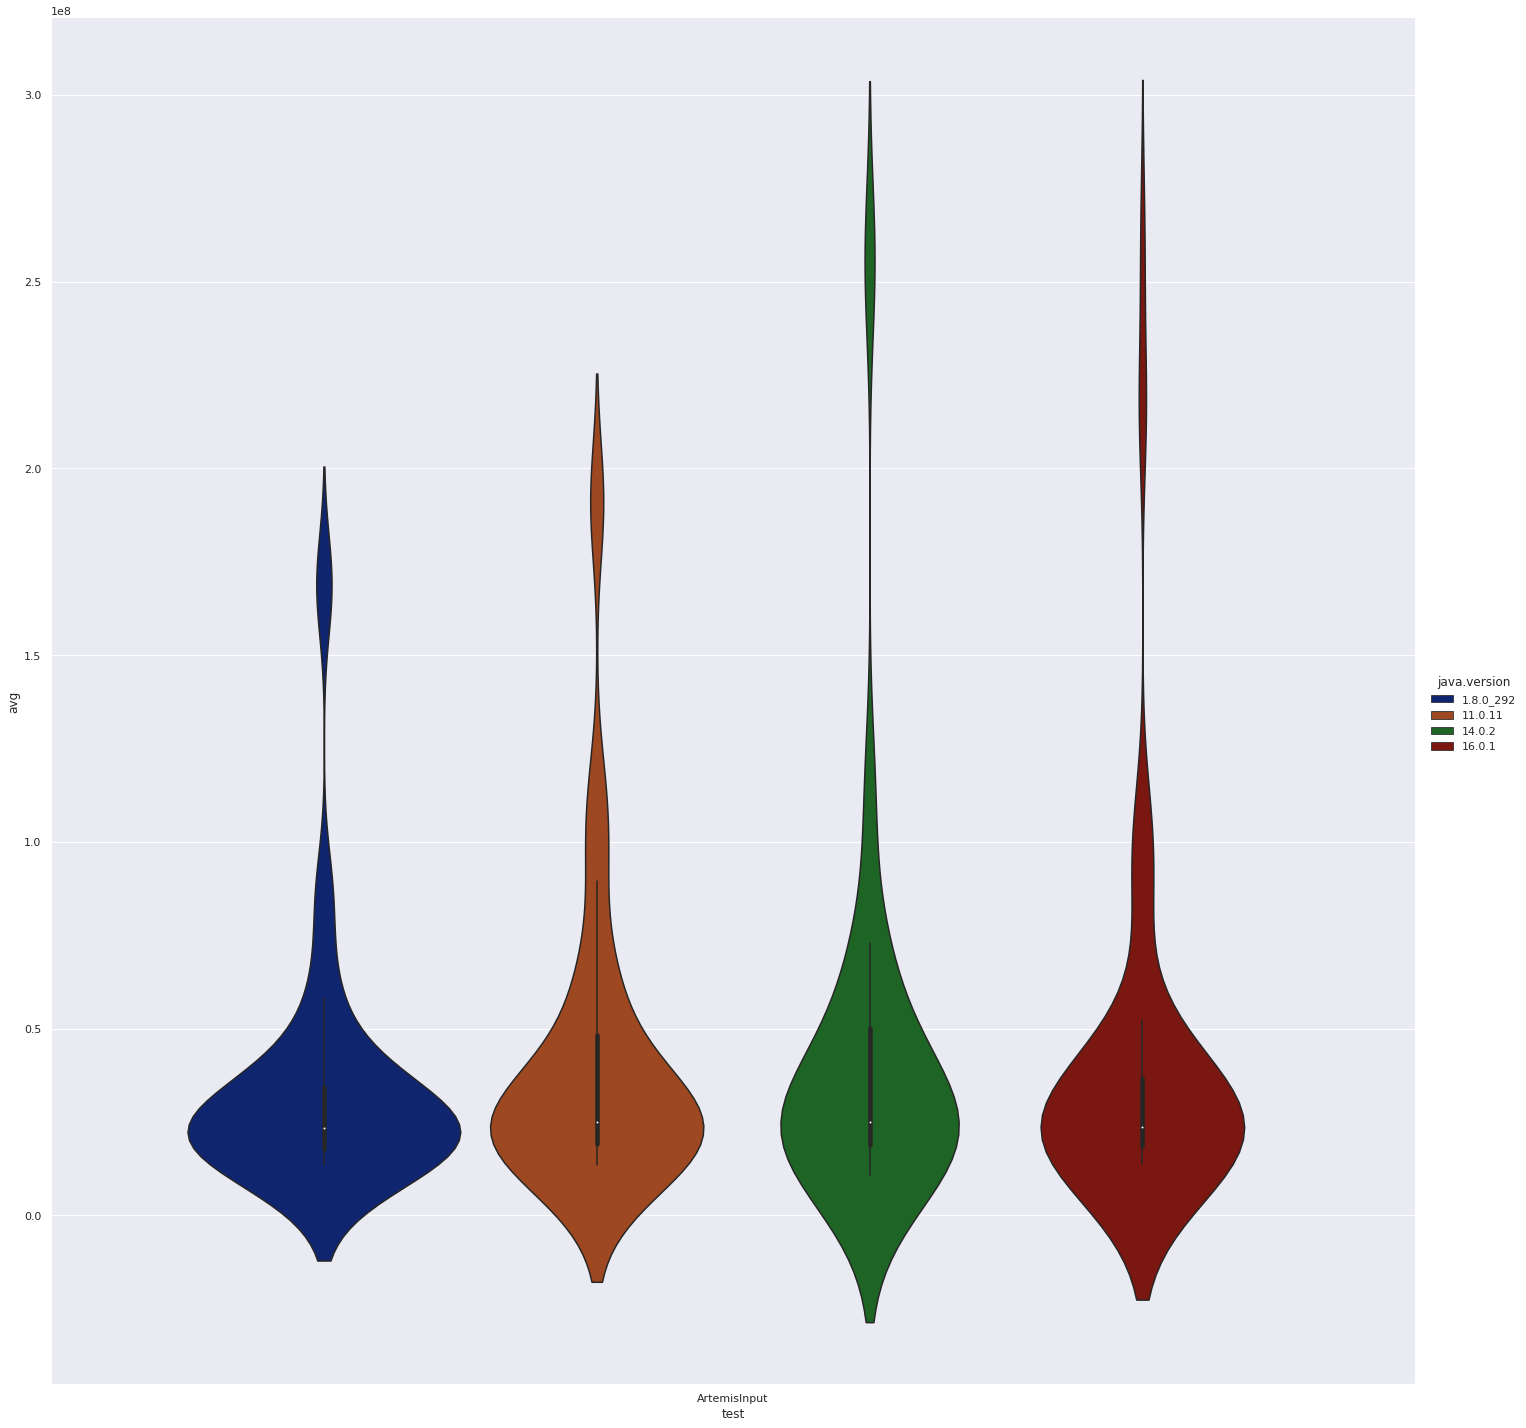

In [10]:
ig = sns.catplot(
    data=inputs, kind="violin",
    x="test", y='avg', hue='java.version',
     palette="dark", alpha=.6, height=20
)

In [25]:
ogroup = outputs.sort_index().groupby(['test', 'java.version']).avg.agg(['min', 'max'])
ogroup

min          max
test             java.version                        
ArtemisGenerator 1.8.0_292     440464030  10860660855
                 11.0.11       438829103  10838204630
                 14.0.2        440532924  11337825674
                 16.0.1        437140152  10870991514

In [26]:
ogroup.index.get_level_values(0).unique()

Index(['ArtemisGenerator'], dtype='object', name='test')

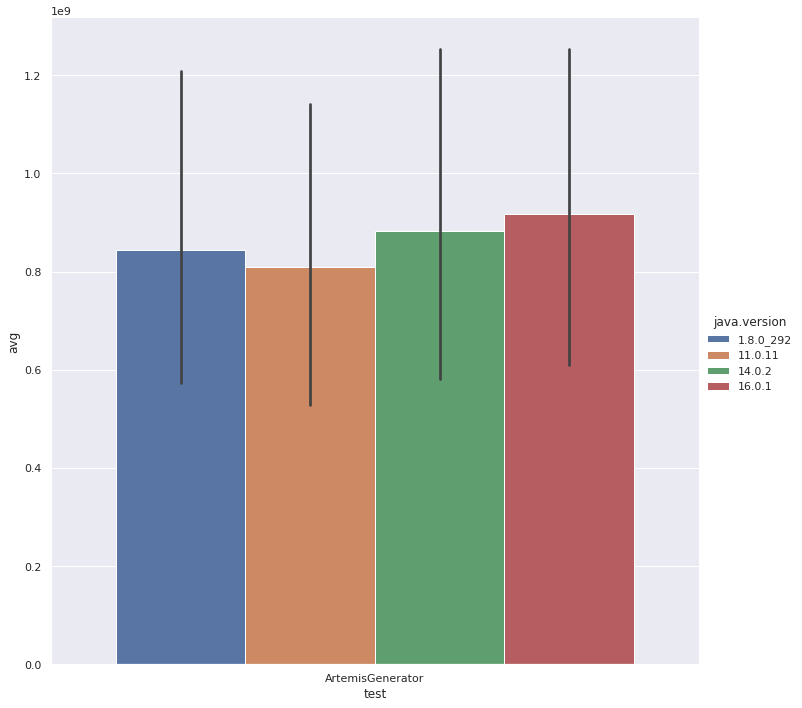

In [12]:
fg = sns.catplot(x='test', y='avg', hue='java.version', 
                        data=outputs, kind='bar', height=10)
#fg.set_xlabels('')


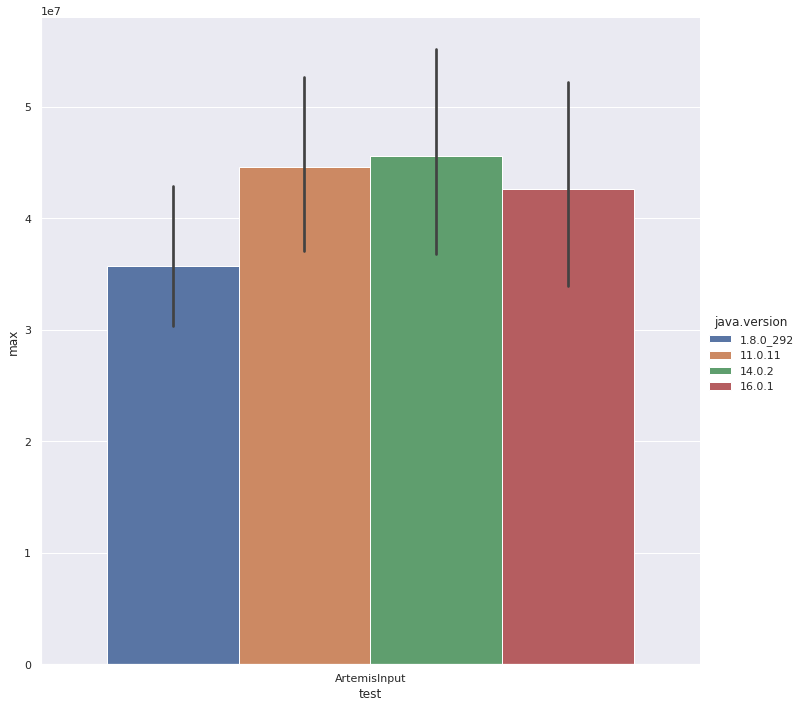

In [28]:
ig = sns.catplot(x='test', y='max', hue='java.version', 
                        data=inputs, kind='bar', height=10)